<img src="../images/topcover.jpg" width="1000" height="50">

For diagnosis purposes, the accuracy score should be much higher. Also, there is greater interest in differentiating between  stroma (connective tissue) vs tumour tissue than classifying the 8 classes of tissues in previous sections. Therefore, greater emphasis is placed on differentiating stroma vs tumour tissues.

Stroma are connective tissues and the stroma to tumour ratio could affect the prognosis of the cancer. A paper mentioned that (Bianconi et al, 2015) in early cervical carcinoma, the disease-free and overall survival were found significantly better in the stroma-poor than in the stroma-rich group. Therefore, the images of interest for pathologists would come from 2 classes, stroma and tumour. 

From the classification of 8 classes, Random Forests Support Vector Machine and Convulated Neural Networks had the best scores. Therefore, these two models will be adopted as models for prediction of tumour vs stroma.

## Classification of colorectal cancer images into 2 classes: Tumour VS Stroma

In [1]:
# imports relevant modules

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist


In [2]:
colorectalx = pd.read_csv('../data/colorectal12.csv')
colorectalx.drop(columns = 'label', inplace=True)
colorectaly = pd.read_csv('../data/colorectal12.csv')

In [3]:
# set up data for modelling 

X = colorectalx
y = colorectaly['label']

In [4]:
# Check distribution since this is a classification problem

y.value_counts(normalize = True)

2    0.5
1    0.5
Name: label, dtype: float64

In [5]:
# split the data into the training and testing sets

X_train, X_val, y_train, y_val = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42
                                                    )

In [6]:
# standard scaler applied

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)

## Random Forest Model 

In [7]:
# instantiate Random Forests 

rf = RandomForestClassifier(n_estimators=100)

In [8]:
# preliminar modeling with cross val score

pre_score = cross_val_score(estimator = rf,
                            X = X_train, 
                            y = y_train,
                            scoring = 'accuracy',
                            cv = 10,
                            verbose = 0)

print('Random Forest mean score: %5.4f' %np.mean(pre_score))

Random Forest mean score: 0.9367


In [9]:
# gridsearch for random forests

rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9402409466780725


{'max_depth': None, 'n_estimators': 200}

In [10]:
# predictions using Random Forests

predictions = gs.predict(X_val)

In [11]:
# Random Forests using GridSearchCV

gs.score(X_train, y_train)

1.0

In [12]:
# Random Forests using GridSearchCV

gs.score(X_val, y_val)

0.9467312348668281

In [13]:
predictions = gs.predict(X_val)

In [14]:
confusion_matrix(y_val, predictions)

array([[194,  13],
       [  9, 197]], dtype=int64)

In [15]:
tn, fp, fn, tp = confusion_matrix(y_val, predictions).ravel()

In [16]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 194
False Positives: 13
False Negatives: 9
True Positives: 197


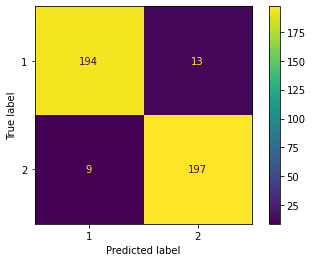

In [17]:
plot_confusion_matrix(gs, X_val, y_val, cmap='viridis', 
                      values_format='d', display_labels=['1', '2']);

## SVC Model

In [18]:
# Instantiate support vector machine.
svc = SVC()

In [19]:
gs1 = GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly'), 'degree':[2]})
gs1.fit(X_train,y_train);

In [20]:
predictions1 = gs1.predict(X_val)

In [21]:
gs1.score(X_train, y_train)

0.97610513739546

In [22]:
gs1.score(X_val, y_val)

0.9249394673123487

In [23]:
predictions1 = gs1.predict(X_val)

In [24]:
confusion_matrix(y_val, predictions1)

array([[189,  18],
       [ 13, 193]], dtype=int64)

In [25]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_val, predictions1).ravel()

In [26]:
print("True Negatives: %s" % tn1)
print("False Positives: %s" % fp1)
print("False Negatives: %s" % fn1)
print("True Positives: %s" % tp1)

True Negatives: 189
False Positives: 18
False Negatives: 13
True Positives: 193


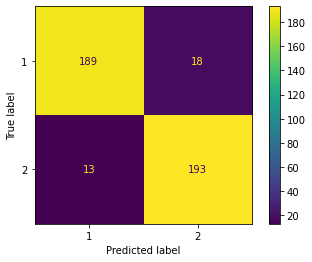

In [27]:
plot_confusion_matrix(gs1, X_val, y_val, cmap='viridis', 
                      values_format='d', display_labels=['1', '2']);

## CNN Model

In [66]:
X1 = colorectalx
y1 = colorectaly['label']

In [67]:
y1.value_counts(normalize = True)

2    0.5
1    0.5
Name: label, dtype: float64

In [68]:
X1 = X1/255

In [69]:
# Reshaping
X1 = X1.values.reshape(-1,64,64,1)       # shaping for the Keras
y1 = y1.values

In [70]:
y1 = utils.to_categorical(y1)

In [71]:
# split the data into the training and testing sets

X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size = 0.2, random_state=42)

In [72]:
print("x_train.shape: ",X1_train.shape)
print("x_val.shape: ",X1_val.shape)
print("y_train.shape: ",y1_train.shape)
print("y_val.shape: ",y1_val.shape)

x_train.shape:  (1000, 64, 64, 1)
x_val.shape:  (250, 64, 64, 1)
y_train.shape:  (1000, 3)
y_val.shape:  (250, 3)


In [73]:
# Check shape of an image.
X1_train.shape

(1000, 64, 64, 1)

In [74]:
# Check shape of an image.
X1_train[0].shape

(64, 64, 1)

In [75]:
# Instantiate a CNN.
cnn_model_2 = Sequential()

In [76]:
# Add a convolutional layer.
cnn_model_2.add(Conv2D(filters=128,             # number of filters
                       kernel_size=(5,5),      # height/width of filter
                       activation='relu',
                       padding = 'same',# activation function 
                       input_shape=(64,64,1))) # shape of input (image)

In [77]:
# Add a pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

In [78]:
cnn_model_2.add(Dropout(0.25))

In [79]:
# Add another convolutional layer.
cnn_model_2.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))

In [80]:
# Add another pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

In [81]:
cnn_model_2.add(Dropout(0.25))

In [82]:
# Add another convolutional layer.
cnn_model_2.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))

# Add another pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

cnn_model_2.add(Dropout(0.25))

In [83]:
cnn_model_2.add(Flatten())

In [84]:
cnn_model_2.add(Dense(256, activation='relu'))
cnn_model_2.add(Dense(64, activation='relu'))
cnn_model_2.add(Dense(32, activation='relu'))

In [85]:
cnn_model_2.add(Dense(3, activation='sigmoid'))

In [86]:
cnn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 128)       3328      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)       

In [88]:
# Compile model
cnn_model_2.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [89]:
datagen = ImageDataGenerator(
        rotation_range=0.5, 
        zoom_range = 0.5, 
        width_shift_range=0.5,  
        height_shift_range=0.5, 
        horizontal_flip=True, 
        vertical_flip=True)

datagen.fit(X1_train)

In [91]:
cnn_model_2.fit_generator(datagen.flow(X1_train,y1_train, batch_size=200),
                              epochs = 20, validation_data = (X1_val,y1_val))

Epoch 1/20
5/5 [==============================] - 16s 3s/step - loss: 0.4801 - accuracy: 0.5020 - val_loss: 0.4690 - val_accuracy: 0.5920
Epoch 2/20
5/5 [==============================] - 17s 3s/step - loss: 0.4656 - accuracy: 0.5120 - val_loss: 0.4628 - val_accuracy: 0.5640
Epoch 3/20
5/5 [==============================] - 17s 3s/step - loss: 0.4568 - accuracy: 0.4960 - val_loss: 0.4375 - val_accuracy: 0.5560
Epoch 4/20
5/5 [==============================] - 17s 3s/step - loss: 0.4457 - accuracy: 0.5640 - val_loss: 0.4213 - val_accuracy: 0.6800
Epoch 5/20
5/5 [==============================] - 16s 3s/step - loss: 0.4238 - accuracy: 0.6410 - val_loss: 0.3755 - val_accuracy: 0.8640
Epoch 6/20
5/5 [==============================] - 16s 3s/step - loss: 0.3669 - accuracy: 0.7890 - val_loss: 0.2890 - val_accuracy: 0.8400
Epoch 7/20
5/5 [==============================] - 16s 3s/step - loss: 0.3160 - accuracy: 0.7850 - val_loss: 0.2536 - val_accuracy: 0.8800
Epoch 8/20
5/5 [==================

**Summary table for Colorectal Cancer Classification models for 2 Tissue type classes:**

| Model| Test Accuracy|Baseline score|
|:---------:|:---:|:--------:|
|  Random Forests |    0.947 |  0.5  |
|SVC|  0.925 |0.5|
|CNN| 0.960| 0.5|


##### CNN model has done well to differentiate between Stroma and Tumour tissues. Pathologist could adopt this model to make more accurate diagnosis and not only differentiate between the 2 tissue types, but decide on the severity of the cancer based on the tumour:stroma ratio. Perhaps if the stroma:tumour ratio is high, it could set as an alarm on the severity of the disease.  

##### Therefore, a website can be created as a database to classify the input colorectal cancer image into Tumour or Stroma by first converting it into pixel data. The next notebook uses raw images (instead of pixel data) for classification using CNN which been the best model for classification of the 2 classes! 